![img](https://drive.google.com/uc?export=view&id=1kgX98Ziw9LzgBCT2BxChttfrTcBltLej)


# MÓDULO 0. Unidad 2 - Trabajo Práctico Entregable 2

---

> Aplicaciones integradoras de los contenidos aprendidos durante las 6 clases.




# Introducción

En la siguiente notebook, se plantean una serie de problemas que deberán resolver con programas, utilizando las herramientas provistas durante el curso.

**La fecha de entrega es el 4/06.**

# 1- La Ruina del Apostador

![stop](https://images.theconversation.com/files/189770/original/file-20171011-16678-1usvyrg.jpg?ixlib=rb-1.1.0&q=45&auto=format&w=926&fit=clip)

La "Ruina del Apostador" (Gambler's Ruin) dice que una persona que juegue algún juego con un valor esperado negativo llegará a perder todo su dinero tarde o temprano, sin importar el sistema que use para apostar.

Podemos hacer una simulación de este concepto en Python, usando la librería `random`.

- Supongamos que comenzamos con 50 fichas (todas del mismo valor) y apostamos una ficha cada vez que jugamos.

- Tenemos una probabilidad de 0.4 de ganar cada vez que jugamos (cómo podemos simular esto?). Si ganamos, tenemos una ficha más. Caso contrario, perdemos la ficha que apostamos.

- En una noche se estima que podemos jugar este juego hasta 300 veces, pero si llegamos a tener 0 fichas ya no vamos a poder apostar en toda la noche.

Crear un programa que simule nuestra noche de apuestas, que imprima en pantalla cuántas apuestas pudimos hacer antes de perder todo el dinero o si pudimos sobrevivir a las 300 apuestas.

Para resolver el problema, crear una función que tenga como entradas la cantidad de fichas inicial, la probabilidad de victoria de cada juego y la cantidad máxima de veces que podemos jugar, que devuelva la cantidad de fichas con la que terminamos al final de la noche y la cantidad de apuestas que pudimos hacer.

- Correr esta función 20 veces y obtener el valor medio de la cantidad de apuestas final.

- Cuánto tiempo tarda cada simulación en ejecutarse? Imprimir en pantalla este tiempo cada vez que se corre la función.

In [ ]:
import random 
import time

In [ ]:
def apuesta (fichas,probabilidad,cantidad_de_veces_que_apuesto):
  cantidad_de_veces_que_apuesto = 0
  while fichas > 0 and cantidad_de_veces_que_apuesto< 300:
    cantidad_de_veces_que_apuesto = cantidad_de_veces_que_apuesto + 1
    apuesta_individual =random.random()
    #print (apuesta_individual)
    if apuesta_individual < probabilidad:
      fichas = fichas + 1  
    else:
      fichas = fichas - 1
  if cantidad_de_veces_que_apuesto ==300:
    print("Ganaste!!!" )
  if (fichas == 0):
    print("En bancarrota")
  print(f"Cantidad de apuestas {cantidad_de_veces_que_apuesto}")
  return (cantidad_de_veces_que_apuesto)

fichas_inicial = 50
probabilidad = 0.40
jugadas_max = 300
suma_apuestas= 0
suma_tiempo= 0
for i in range(20):
    inicio = time.time()   
    apuesta1 = apuesta (fichas_inicial,probabilidad,jugadas_max)
    fin = time.time()
    duracion = fin - inicio
    print ("La duracion de la ejecución de la función es:", duracion)
    print ("-----------------------------------------------")
    suma_tiempo= suma_tiempo + duracion
    suma_apuestas= suma_apuestas + apuesta1
  #print (suma_apuestas)
promedio_apuestas = suma_apuestas/20
print ("El Valor medio de la cantidad de apuestas es:", promedio_apuestas)
print ("La simulación demora es correr:", suma_tiempo)

Ganaste!!!
Cantidad de apuestas 300
La duracion de la ejecución de la función es: 0.0
-----------------------------------------------
En bancarrota
Cantidad de apuestas 280
La duracion de la ejecución de la función es: 0.0
-----------------------------------------------
En bancarrota
Cantidad de apuestas 202
La duracion de la ejecución de la función es: 0.0
-----------------------------------------------
En bancarrota
Cantidad de apuestas 282
La duracion de la ejecución de la función es: 0.0
-----------------------------------------------
En bancarrota
Cantidad de apuestas 276
La duracion de la ejecución de la función es: 0.0005435943603515625
-----------------------------------------------
En bancarrota
Cantidad de apuestas 206
La duracion de la ejecución de la función es: 0.0
-----------------------------------------------
En bancarrota
Cantidad de apuestas 174
La duracion de la ejecución de la función es: 0.0
-----------------------------------------------
En bancarrota
Cantidad de 

# 2- Precios de Acciones y Carteras de Inversión

![investing](https://dfi.wa.gov/sites/default/files/investing-stocks-16x9.jpg)

Parte del Análisis Cuantitativo en Finanzas depende de la creación de Carteras de Inversión mediante la prueba de estrategias con datos del pasado, la mayoría de ellos en forma de precios diarios de los activos en los que se quiere invertir.

En este ejercicio vamos a realizar un análisis simple de acciones del mercado de USA y crear carteras de inversión "aleatorias" para ver cómo les fue durante el año 2020.

Para eso, debemos conseguir un dataset y una manera sencilla de hacerlo es usando [Pandas DataReader](https://pandas-datareader.readthedocs.io/en/latest/index.html).

Podemos instalar la librería directamente usando Conda (en nuestros entornos locales) o Pip (en Colab).

`conda install -c anaconda pandas-datareader`

`!pip install pandas-datareader`

In [ ]:
!pip install pandas-datareader

  Using cached pandas_datareader-0.9.0-py3-none-any.whl (107 kB)


In [ ]:
# Instalar la librería
#!pip install pandas-datareader
# Hacemos import y descargamos precios para Mercado Libre durante todo el 2020.
from pandas_datareader import data
import pandas as pd
# Un ticker es la abreviación con la cual se encuentra al activo
# cuando se busca su precio o se realiza una orden de mercado.
tickers = ['MELI']

# Definimos el rango de fechas deseado
start_date = '2020-01-01'
end_date = '2020-12-31'

# Obtenemos un DataFrame con los precios diarios de la acción
df = data.DataReader(
    tickers,
    start=start_date, 
    end=end_date, 
    data_source='yahoo', # Yahoo Finance es uno de los recursos más simples de acceder
)

# Mostremos las primeras columnas de los datos
df.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,MELI,MELI,MELI,MELI,MELI,MELI
Date,,,,,,
2020-01-02,610.190002,610.190002,615.840027,576.940002,576.940002,589200
2020-01-03,607.799988,607.799988,609.840027,600.059998,602.619995,320900
2020-01-06,606.549988,606.549988,613.789978,601.000000,601.039978,209700
2020-01-07,625.000000,625.000000,627.969971,604.739990,606.640015,480900
2020-01-08,633.440002,633.440002,637.820007,624.549988,625.000000,334600


In [ ]:
df.head(10)

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,MELI,MELI,MELI,MELI,MELI,MELI
Date,,,,,,
2020-01-02,610.190002,610.190002,615.840027,576.940002,576.940002,589200
2020-01-03,607.799988,607.799988,609.840027,600.059998,602.619995,320900
2020-01-06,606.549988,606.549988,613.789978,601.000000,601.039978,209700
2020-01-07,625.000000,625.000000,627.969971,604.739990,606.640015,480900
2020-01-08,633.440002,633.440002,637.820007,624.549988,625.000000,334600
2020-01-09,646.429993,646.429993,649.049988,638.590027,643.429993,413800
2020-01-10,669.479980,669.479980,670.150024,648.630005,653.789978,680200
2020-01-13,691.099976,691.099976,697.219971,670.070007,670.440002,660800


In [ ]:
df.columns


MultiIndex([('Adj Close', 'MELI'),
            (    'Close', 'MELI'),
            (     'High', 'MELI'),
            (      'Low', 'MELI'),
            (     'Open', 'MELI'),
            (   'Volume', 'MELI')],
           names=['Attributes', 'Symbols'])

In [ ]:
df.columns= ["Adj Close", 'Close','High','Low','Open','Volume']
df


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02,610.190002,610.190002,615.840027,576.940002,576.940002,589200
2020-01-03,607.799988,607.799988,609.840027,600.059998,602.619995,320900
2020-01-06,606.549988,606.549988,613.789978,601.000000,601.039978,209700
2020-01-07,625.000000,625.000000,627.969971,604.739990,606.640015,480900
2020-01-08,633.440002,633.440002,637.820007,624.549988,625.000000,334600
...,...,...,...,...,...,...
2020-12-24,1690.479980,1690.479980,1694.479980,1665.900024,1672.000000,132800
2020-12-28,1663.719971,1663.719971,1703.319946,1625.699951,1700.000000,285900
2020-12-29,1673.489990,1673.489990,1689.410034,1640.030029,1680.000000,278300


In [ ]:
df.reset_index(inplace=True, drop=False)
df
df= df.set_index("Date")
df

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02,610.190002,610.190002,615.840027,576.940002,576.940002,589200
2020-01-03,607.799988,607.799988,609.840027,600.059998,602.619995,320900
2020-01-06,606.549988,606.549988,613.789978,601.000000,601.039978,209700
2020-01-07,625.000000,625.000000,627.969971,604.739990,606.640015,480900
2020-01-08,633.440002,633.440002,637.820007,624.549988,625.000000,334600
...,...,...,...,...,...,...
2020-12-24,1690.479980,1690.479980,1694.479980,1665.900024,1672.000000,132800
2020-12-28,1663.719971,1663.719971,1703.319946,1625.699951,1700.000000,285900
2020-12-29,1673.489990,1673.489990,1689.410034,1640.030029,1680.000000,278300


In [ ]:
df_meli = df.iloc[:,0]
#type(df_meli)
df_meli

Date
2020-01-02     610.190002
2020-01-03     607.799988
2020-01-06     606.549988
2020-01-07     625.000000
2020-01-08     633.440002
                 ...     
2020-12-24    1690.479980
2020-12-28    1663.719971
2020-12-29    1673.489990
2020-12-30    1712.939941
2020-12-31    1675.219971
Name: Adj Close, Length: 253, dtype: float64

In [ ]:
print(df_meli.index)

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=253, freq=None)


In [ ]:
!pip install matplotlib


In [ ]:
!pip install seaborn

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
sns.set()

<AxesSubplot:xlabel='Date'>

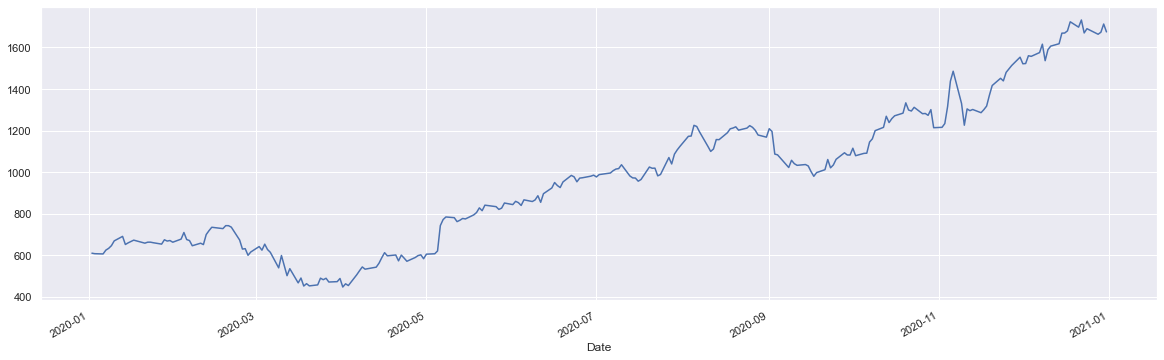

In [ ]:
#df_meli.plot()
fix, ax=plt.subplots(figsize=(20, 6))
df_meli.plot(ax=ax)

In [ ]:
dia_maximo= df_meli.idxmax().date()
valor_maximo = df_meli.max()
print ("El valor máximo en el periodo es de usd:", valor_maximo,"El día:", dia_maximo)

El valor máximo en el periodo es de usd: 1732.3900146484375 El día: 2020-12-22


In [ ]:
dia_minimo= df_meli.idxmin().date()
valor_minimo = df_meli.min()
print ("El valor mínimo en el periodo es de usd:", valor_minimo,"El día:", dia_minimo)

El valor mínimo en el periodo es de usd: 447.3399963378906 El día: 2020-04-01


Desarrollar los siguientes ejercicios:

- Utilizaremos sólo la columna Adj. Close para trabajar y nos gustaría tener un gráfico de cómo se movieron los precios de la acción, usando `plot`. Cuál es el precio máximo y mínimo que alcanzó la acción en el año y en qué fechas se alcanzaron?

- La variable *tickers* es una lista de acciones que podemos cambiar para conseguir los precios que deseemos. Consigamos los precios de [FAANG](https://blog.selfbank.es/que-es-faang/), buscando sus tickers correspondientes y armemos un dataframe con el Adj. Close de cada una de las acciones durante el 2020.

- Cómo podemos calcular el porcentaje de ganancia de estas acciones en el año?

- Supongamos que tenemos $10.000 para invertir en estas acciones y armamos una cartera "aleatoria" (no es posible invertir una cantidad negativa ni invertir más dinero del que se tiene). Cómo podemos mostrar la evolución de esa cartera en el tiempo? Graficar 5 carteras aleatorias y su evolución en el año. Cómo se comparan con una estrategia que invierte el 20% inicial del capital en cada una de las acciones?

In [ ]:

tickers = ['FB',"AMZN", "AAPL","NFLX","GOOGL"]

# Definimos el rango de fechas deseado
start_date = '2020-01-01'
end_date = '2020-12-31'

# Obtenemos un DataFrame con los precios diarios de la acción
df = data.DataReader(
    tickers,
    start=start_date, 
    end=end_date, 
    data_source='yahoo', # Yahoo Finance es uno de los recursos más simples de acceder
)

# Mostremos las primeras columnas de los datos
df.head()

Attributes   Adj Close                                                   \
Symbols             FB         AMZN       AAPL        NFLX        GOOGL   
Date                                                                      
2020-01-02  209.779999  1898.010010  74.207466  329.809998  1368.680054   
2020-01-03  208.669998  1874.969971  73.486023  325.899994  1361.520020   
2020-01-06  212.600006  1902.880005  74.071579  335.829987  1397.810059   
2020-01-07  213.059998  1906.859985  73.723213  330.750000  1395.109985   
2020-01-08  215.220001  1891.969971  74.909149  339.260010  1405.040039   

Attributes       Close                                                   ...  \
Symbols             FB         AMZN       AAPL        NFLX        GOOGL  ...   
Date                                                                     ...   
2020-01-02  209.779999  1898.010010  75.087502  329.809998  1368.680054  ...   
2020-01-03  208.669998  1874.969971  74.357498  325.899994  1361.520020  ...   
2020-01-06  212.600006  1902.880005  74.949997  335.829987  1397.810059  ...   
2020-01-07  213.059998  1906.859985  74.597504  330.750000  1395.109985  ...   
2020-01-08  215.220001  1891.969971  75.797501  339.260010  1405.040039  ...   

Attributes        Open                                                   \
Symbols             FB         AMZN       AAPL        NFLX        GOOGL   
Date                                                                      
2020-01-02  206.750000  1875.000000  74.059998  326.100006  1348.410034   
2020-01-03  207.210007  1864.500000  74.287498  326.779999  1348.000000   
2020-01-06  206.699997  1860.000000  73.447502  323.119995  1351.630005   
2020-01-07  212.820007  1904.500000  74.959999  336.470001  1400.459961   
2020-01-08  213.000000  1898.040039  74.290001  331.489990  1394.819946   

Attributes      Volume                                                
Symbols             FB       AMZN         AAPL       NFLX      GOOGL  
Date                                                                  
2020-01-02  12077100.0  4029000.0  135480400.0  4485800.0  1363900.0  
2020-01-03  11188400.0  3764400.0  146322800.0  3806900.0  1170400.0  
2020-01-06  17058900.0  4061800.0  118387200.0  5663100.0  2338400.0  
2020-01-07  14912400.0  4044900.0  108872000.0  4703200.0  1716500.0  
2020-01-08  13475000.0  3508000.0  132079200.0  7104500.0  1765700.0  

[5 rows x 30 columns]

In [ ]:
#Seleccionar solo las columnas Adj Close
df_FAANG = df.iloc[:, df.columns.get_level_values(0)=='Adj Close']
df_FAANG


Attributes   Adj Close                                                  
Symbols             FB         AMZN        AAPL        NFLX        GOOGL
Date                                                                    
2020-01-02  209.779999  1898.010010   74.207466  329.809998  1368.680054
2020-01-03  208.669998  1874.969971   73.486023  325.899994  1361.520020
2020-01-06  212.600006  1902.880005   74.071579  335.829987  1397.810059
2020-01-07  213.059998  1906.859985   73.723213  330.750000  1395.109985
2020-01-08  215.220001  1891.969971   74.909149  339.260010  1405.040039
...                ...          ...         ...         ...          ...
2020-12-24  267.399994  3172.689941  131.549637  513.969971  1734.160034
2020-12-28  277.000000  3283.959961  136.254608  519.119995  1773.959961
2020-12-29  276.779999  3322.000000  134.440399  530.869995  1757.760010
2020-12-30  271.869995  3285.850098  133.294067  524.590027  1736.250000
2020-12-31  273.160004  3256.929932  132.267349  540.729980  1752.640015

[253 rows x 5 columns]

In [ ]:
#Eliminar un nivel a las columnas para poder trabajar con los valores
df_FAANG.columns=df_FAANG.columns.droplevel(0)
df_FAANG.columns


Index(['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOGL'], dtype='object', name='Symbols')

In [ ]:
ganancia_facebook = (df_FAANG.iloc[-1]["FB"]-df_FAANG.iloc [0]["FB"])/df_FAANG.iloc [0]["FB"]
print ("La Ganancia Anual de Facebook es de ", ganancia_facebook.round (2), "%")
ganancia_amazon = (df_FAANG.iloc[-1]["AMZN"]-df_FAANG.iloc [0]["AMZN"])/df_FAANG.iloc [0]["AMZN"]
print ("La Ganacia Anual de Amazon es de ", ganancia_amazon.round (2), "%")
ganancia_apple = (df_FAANG.iloc[-1]["AAPL"]-df_FAANG.iloc [0]["AAPL"])/df_FAANG.iloc [0]["AAPL"]
print ("La Ganacia Anual de Apple es de ", ganancia_apple.round (2), "%")
ganancia_netflix = (df_FAANG.iloc[-1]["NFLX"]-df_FAANG.iloc [0]["NFLX"])/df_FAANG.iloc [0]["NFLX"]
print ("La Ganacia Anual de Netflix es de ", ganancia_netflix.round (2), "%")
ganancia_google = (df_FAANG.iloc[-1]["GOOGL"]-df_FAANG.iloc [0]["GOOGL"])/df_FAANG.iloc [0]["GOOGL"]
print ("La Ganacia Anual de Google es de ", ganancia_google.round (2), "%")

La Ganancia Anual de Facebook es de  0.3 %
La Ganacia Anual de Amazon es de  0.72 %
La Ganacia Anual de Apple es de  0.78 %
La Ganacia Anual de Netflix es de  0.64 %
La Ganacia Anual de Google es de  0.28 %


In [ ]:
monto = 2000
df_FAANG_20=df_FAANG
df_FAANG_20["Cantidad FB"] = monto/df_FAANG_20.iloc[0,0]
df_FAANG_20["Total FB"] = df_FAANG_20 ["FB"]*df_FAANG_20["Cantidad FB"]
df_FAANG_20["Cantidad AMZN"] = monto/df_FAANG_20.iloc[0,1]
df_FAANG_20["Total AMZN"] = df_FAANG_20 ["AMZN"]*df_FAANG_20["Cantidad AMZN"]
df_FAANG_20["Cantidad AAPL"] = monto/df_FAANG_20.iloc[0,2]
df_FAANG_20["Total AAPL"] = df_FAANG_20 ["AAPL"]*df_FAANG_20["Cantidad AAPL"]
df_FAANG_20["Cantidad NFLX"] = monto/df_FAANG_20.iloc[0,3]
df_FAANG_20["Total NFLX"] = df_FAANG_20 ["NFLX"]*df_FAANG_20["Cantidad NFLX"]
df_FAANG_20["Cantidad GOOGL"] = monto/df_FAANG_20.iloc[0,4]
df_FAANG_20["Total GOOGL"] = df_FAANG_20 ["GOOGL"]*df_FAANG_20["Cantidad GOOGL"]
df_FAANG_20 ["Cartera Equilibrada"]= df_FAANG_20["Total FB"] + df_FAANG_20["Total AMZN"] + df_FAANG_20["Total AAPL"] + df_FAANG_20["Total NFLX"]+df_FAANG_20["Total GOOGL"]
df_FAANG_20

<ipython-input-35-834b69040bbc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FAANG_20["Cantidad FB"] = monto/df_FAANG_20.iloc[0,0]
<ipython-input-35-834b69040bbc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FAANG_20["Total FB"] = df_FAANG_20 ["FB"]*df_FAANG_20["Cantidad FB"]
<ipython-input-35-834b69040bbc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

Symbols,FB,AMZN,AAPL,NFLX,GOOGL,Cantidad FB,Total FB,Cantidad AMZN,Total AMZN,Cantidad AAPL,Total AAPL,Cantidad NFLX,Total NFLX,Cantidad GOOGL,Total GOOGL,Total Cartera,Cartera Equilibrada
Date,,,,,,,,,,,,,,,,,
2020-01-02,209.779999,1898.010010,74.207466,329.809998,1368.680054,9.533797,2000.000000,1.053735,2000.000000,26.951466,2000.000000,6.064098,2000.000000,1.461262,2000.000000,10000.000000,10000.000000
2020-01-03,208.669998,1874.969971,73.486023,325.899994,1361.520020,9.533797,1989.417479,1.053735,1975.721899,26.951466,1980.556049,6.064098,1976.289356,1.461262,1989.537315,9911.522098,9911.522098
2020-01-06,212.600006,1902.880005,74.071579,335.829987,1397.810059,9.533797,2026.885378,1.053735,2005.131685,26.951466,1996.337642,6.064098,2036.505801,1.461262,2042.566566,10107.427073,10107.427073
2020-01-07,213.059998,1906.859985,73.723213,330.750000,1395.109985,9.533797,2031.270844,1.053735,2009.325531,26.951466,1986.948674,6.064098,2005.700267,1.461262,2038.621052,10071.866367,10071.866367
2020-01-08,215.220001,1891.969971,74.909149,339.260010,1405.040039,9.533797,2051.863881,1.053735,1993.635398,26.951466,2018.911387,6.064098,2057.305796,1.461262,2053.131461,10174.847923,10174.847923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,267.399994,3172.689941,131.549637,513.969971,1734.160034,9.533797,2549.337358,1.053735,3343.175141,26.951466,3545.455564,6.064098,3116.764043,1.461262,2534.061966,15088.794073,15088.794073
2020-12-28,277.000000,3283.959961,136.254608,519.119995,1773.959961,9.533797,2640.861871,1.053735,3460.424280,26.951466,3672.261439,6.064098,3147.994293,1.461262,2592.220083,15513.761965,15513.761965
2020-12-29,276.779999,3322.000000,134.440399,530.869995,1757.760010,9.533797,2638.764424,1.053735,3500.508409,26.951466,3623.365847,6.064098,3219.247440,1.461262,2568.547711,15550.433831,15550.433831


In [ ]:
df0 = df_FAANG_20["Cartera Equilibrada"]
df0

Date
2020-01-02    10000.000000
2020-01-03     9911.522098
2020-01-06    10107.427073
2020-01-07    10071.866367
2020-01-08    10174.847923
                  ...     
2020-12-24    15088.794073
2020-12-28    15513.761965
2020-12-29    15550.433831
2020-12-30    15365.121006
2020-12-31    15441.098286
Name: Cartera Equilibrada, Length: 253, dtype: float64

In [ ]:
import numpy as np
def cartera_aleatoria (lista, df):
    monto_FB = lista [0] * 10000
    monto_AMZN = lista [1] * 10000
    monto_AAPL = lista [2] * 10000
    monto_NFLX = lista [3] * 10000
    monto_GOOGL = lista [4] * 10000
    df ["Cantidad FB"] = monto_FB/df.iloc[0,0]
    df ["Total FB"] = df ["FB"]*df["Cantidad FB"]
    df ["Cantidad AMZN"] = monto_AMZN /df.iloc[0,1]
    df["Total AMZN"] = df ["AMZN"]*df ["Cantidad AMZN"]
    df ["Cantidad AAPL"] = monto_AAPL /df.iloc[0,2]
    df["Total AAPL"] = df["AAPL"]*df["Cantidad AAPL"]
    df["Cantidad NFLX"] = monto_NFLX /df.iloc[0,3]
    df["Total NFLX"] = df["NFLX"]*df["Cantidad NFLX"]
    df["Cantidad GOOGL"] = monto_GOOGL /df.iloc[0,4]
    df["Total GOOGL"] = df ["GOOGL"]*df["Cantidad GOOGL"]
    df["Total Cartera"]= df["Total FB"] + df["Total AMZN"] + df["Total AAPL"] + df["Total NFLX"]+df["Total GOOGL"]
    return (df)

lista_random = np.random.random(5) # genero lista de 5 elementos random
lista_random = lista_random  / lista_random.sum()  # a cada elemento lo divido por la suma de todos
print (lista_random)                          
cartera1 = cartera_aleatoria(lista_random, df_FAANG)

cartera1 = cartera1.rename(columns= {"Total Cartera": "Cartera 1"})
cartera1
df1 = cartera1 ["Cartera 1"]
df1


[0.11023285 0.05589259 0.29986877 0.46741012 0.06659566]


<ipython-input-28-0936b3e1dbcc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ["Cantidad FB"] = monto_FB/df.iloc[0,0]
<ipython-input-28-0936b3e1dbcc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ["Total FB"] = df ["FB"]*df["Cantidad FB"]
<ipython-input-28-0936b3e1dbcc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

Date
2020-01-02    10000.000000
2020-01-03     9899.332473
2020-01-06    10110.250889
2020-01-07    10026.454870
2020-01-08    10206.779688
                  ...     
2020-12-24    15783.077273
2020-12-28    16148.766781
2020-12-29    16244.141288
2020-12-30    16061.906166
2020-12-31    16255.391116
Name: Cartera 1, Length: 253, dtype: float64

In [ ]:
lista_random = np.random.random(5) # genero lista de 5 elementos random
lista_random = lista_random  / lista_random.sum()  # a cada elemento lo divido por la suma de todos
print (lista_random)                          
cartera2 = cartera_aleatoria(lista_random, df_FAANG )
cartera2 = cartera2.rename(columns= {"Total Cartera": "Cartera 2"})
cartera2
df2 = cartera2 ["Cartera 2"]
df2

[0.19571085 0.17239495 0.09290794 0.27330133 0.26568492]


<ipython-input-28-0936b3e1dbcc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ["Cantidad FB"] = monto_FB/df.iloc[0,0]
<ipython-input-28-0936b3e1dbcc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ["Total FB"] = df ["FB"]*df["Cantidad FB"]
<ipython-input-28-0936b3e1dbcc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

Date
2020-01-02    10000.000000
2020-01-03     9913.385191
2020-01-06    10135.462768
2020-01-07    10091.670339
2020-01-08    10202.940478
                  ...     
2020-12-24    14648.791509
2020-12-28    15018.260391
2020-12-29    15093.966427
2020-12-30    14907.178039
2020-12-31    15045.652163
Name: Cartera 2, Length: 253, dtype: float64

In [ ]:
lista_random = np.random.random(5) # genero lista de 5 elementos random
lista_random = lista_random  / lista_random.sum()  # a cada elemento lo divido por la suma de todos
print (lista_random)                          
cartera3 = cartera_aleatoria(lista_random, df_FAANG )
cartera3 = cartera3.rename(columns= {"Total Cartera": "Cartera 3"})
cartera3
df3 = cartera3 ["Cartera 3"]
df3

[0.26904569 0.21916636 0.26246487 0.21697107 0.03235201]


<ipython-input-28-0936b3e1dbcc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ["Cantidad FB"] = monto_FB/df.iloc[0,0]
<ipython-input-28-0936b3e1dbcc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ["Total FB"] = df ["FB"]*df["Cantidad FB"]
<ipython-input-28-0936b3e1dbcc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

Date
2020-01-02    10000.000000
2020-01-03     9906.227543
2020-01-06    10083.473321
2020-01-07    10047.589376
2020-01-08    10158.375155
                  ...     
2020-12-24    15536.934598
2020-12-28    15998.239713
2020-12-29    16048.646868
2020-12-30    15856.989598
2020-12-31    15913.879055
Name: Cartera 3, Length: 253, dtype: float64

In [ ]:
lista_random = np.random.random(5) # genero lista de 5 elementos random
lista_random = lista_random  / lista_random.sum()  # a cada elemento lo divido por la suma de todos
print (lista_random)                          
cartera4 = cartera_aleatoria(lista_random, df_FAANG )
cartera4 = cartera4.rename(columns= {"Total Cartera": "Cartera 4"})
cartera4
df4 = cartera4 ["Cartera 4"]
df4

[0.05091673 0.2247905  0.23224013 0.2620671  0.22998554]


<ipython-input-28-0936b3e1dbcc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ["Cantidad FB"] = monto_FB/df.iloc[0,0]
<ipython-input-28-0936b3e1dbcc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ["Total FB"] = df ["FB"]*df["Cantidad FB"]
<ipython-input-28-0936b3e1dbcc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

Date
2020-01-02    10000.000000
2020-01-03     9904.339873
2020-01-06    10105.142936
2020-01-07    10055.167969
2020-01-08    10164.197258
                  ...     
2020-12-24    15521.569596
2020-12-28    15931.699500
2020-12-29    15985.584603
2020-12-30    15808.932657
2020-12-31    15901.468915
Name: Cartera 4, Length: 253, dtype: float64

In [ ]:
lista_random = np.random.random(5) # genero lista de 5 elementos random
lista_random = lista_random  / lista_random.sum()  # a cada elemento lo divido por la suma de todos
print (lista_random)                          
cartera5 = cartera_aleatoria(lista_random, df_FAANG )
cartera5 = cartera5.rename(columns= {"Total Cartera": "Cartera 5"})
cartera5
df5 = cartera5 ["Cartera 5"]
df5

[0.21725422 0.11036429 0.22929558 0.04395709 0.39912882]


<ipython-input-28-0936b3e1dbcc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ["Cantidad FB"] = monto_FB/df.iloc[0,0]
<ipython-input-28-0936b3e1dbcc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ["Total FB"] = df ["FB"]*df["Cantidad FB"]
<ipython-input-28-0936b3e1dbcc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

Date
2020-01-02    10000.000000
2020-01-03     9926.724226
2020-01-06    10120.808931
2020-01-07    10102.478295
2020-01-08    10193.134065
                  ...     
2020-12-24    14420.998890
2020-12-28    14853.426903
2020-12-29    14785.628847
2020-12-30    14607.241865
2020-12-31    14641.367637
Name: Cartera 5, Length: 253, dtype: float64

In [ ]:
df_carteras = pd.concat ([df0,df1, df2,df3,df4,df5],axis=1)
#df_carteras = pd.concat([df_FAANG_20, cartera1 , cartera2, cartera3, cartera4 ,cartera5], axis =1)
#df_carteras= df_carteras.to_frame()
df_carteras



,Cartera Equilibrada,Cartera 1,Cartera 2,Cartera 3,Cartera 4,Cartera 5
Date,,,,,,
2020-01-02,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
2020-01-03,9911.522098,9899.332473,9913.385191,9906.227543,9904.339873,9926.724226
2020-01-06,10107.427073,10110.250889,10135.462768,10083.473321,10105.142936,10120.808931
2020-01-07,10071.866367,10026.454870,10091.670339,10047.589376,10055.167969,10102.478295
2020-01-08,10174.847923,10206.779688,10202.940478,10158.375155,10164.197258,10193.134065
...,...,...,...,...,...,...
2020-12-24,15088.794073,15783.077273,14648.791509,15536.934598,15521.569596,14420.998890
2020-12-28,15513.761965,16148.766781,15018.260391,15998.239713,15931.699500,14853.426903
2020-12-29,15550.433831,16244.141288,15093.966427,16048.646868,15985.584603,14785.628847


<AxesSubplot:xlabel='Date'>

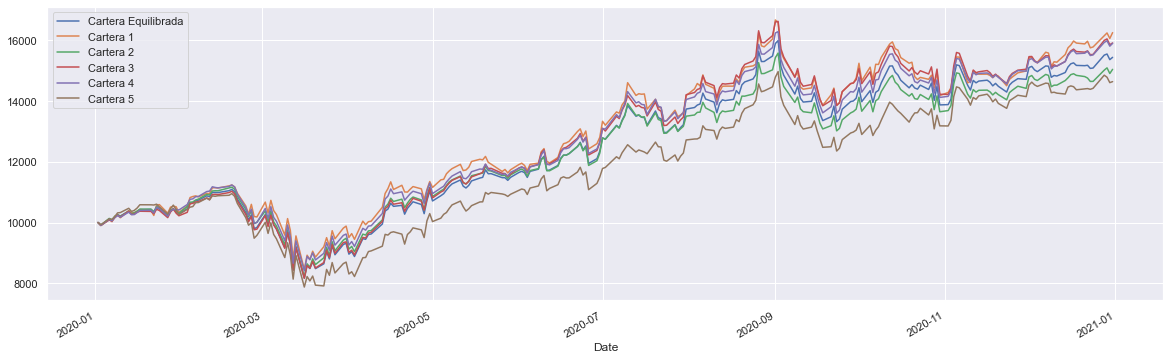

In [ ]:
sns.set()
fix, ax=plt.subplots(figsize=(20, 6))
df_carteras.plot(ax=ax)
#df_FAANG_20["Total Cartera"].plot(ax=ax)
#df1 ["cartera1"].plot (ax=ax)
#df2 ["cartera2"].plot (ax=ax)
#cartera3 ["Total Cartera"].plot (ax=ax)
#cartera4 ["Total Cartera"].plot (ax=ax)
#cartera5 ["Total Cartera"].plot (ax=ax)

# 3- Trabajando con la EPH

![eph](https://pbs.twimg.com/media/EehLGmHWAAYGkRj?format=jpg&name=medium)

La Encuesta Permanente de Hogares (EPH) es un trabajo desarrollado por el INDEC (en convenio con las direcciones provinciales de estadística) y es un repositorio de datos que nos permite conocer las características sociodemográficas y socieconómicas de la población argentina, que es actualizado de manera trimestral.

En este caso vamos a trabajar con una muestra de la misma, con aproximadamente 660 hogares, la cual vamos a poder leer directamente desde un link público de Drive.
La mayoría de sus columnas tienen nombres en código, por lo que es necesario leer el diccionario de variables disponible en el [siguiente link](https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_disenoreg_T3_2013.pdf) antes de comenzar a hacer el análisis de los datos.


In [ ]:
import pandas as pd
# URL de la muestra, pueden entrar a ese link y descargar los datos también.
path = 'https://drive.google.com/uc?export=download&id=1uU18pevuixKbQ14M5zoCHJqAG_GZdA32'
# Leemos el archivo de Excel en la URL desde Pandas.
df_hogar = pd.read_excel(path)
df_hogar.head()

,CODUSU,Unnamed: 1,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,...,GDECCFR,PDECCFR,ADECCFR,PONDIH,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNOQXUHLMKSCDEGGFB00590361,1,2018,3,1,1,42,S,10,479,...,07,,7,537,1,0,98,0,0,0
1,TQRMNORSSHKNLUCDEGGFB00618609,1,2018,3,1,1,42,S,10,448,...,10,,10,493,1,0,98,0,0,0
2,TQRMNOUQRHJOKRCDEGIBJ00613161,1,2018,3,1,1,41,N,12,280,...,,04,5,528,1,0,98,0,0,0
3,TQRMNOSTUHKMKRCDEGIBJ00618817,1,2018,3,1,1,41,N,12,212,...,,07,9,432,1,0,98,0,0,0
4,TQRMNOPWWHJMLLCDEGGFB00613105,1,2018,3,1,1,42,S,10,478,...,06,,6,534,1,2,98,0,0,0


Para hacer nuestro análisis de esta muestra, respondamos las siguientes preguntas:

- ¿Cuántos hogares por cada región tenemos? Expresarlo gráficamente.

- ¿Cómo se distribuye el Ingreso Total Familiar? Y el ingreso per cápita? ¿Cuáles son los valores promedio? ¿Y sus medianas?

- ¿Cuántas viviendas tienen acceso al agua por la red pública? Revisar la columna IV7 para responder esta pregunta.

- Crear una nueva columna que represente la cantidad de habitaciones por habitante del hogar. ¿Cómo es su distribución?

- ¿Existe alguna relación a simple vista entre la cantidad de cuartos que tiene un hogar y el nivel de ingresos del mismo? Realizar un scatter plot para visualizar ambas variables.

¿Cuántos hogares por cada región tenemos? Expresarlo gráficamente.

In [ ]:
df_hogar.groupby(by=['REGION'], as_index=False).agg({'NRO_HOGAR': 'sum'})

,REGION,NRO_HOGAR
0,1,119
1,40,133
2,41,65
3,42,59
4,43,227
5,44,83


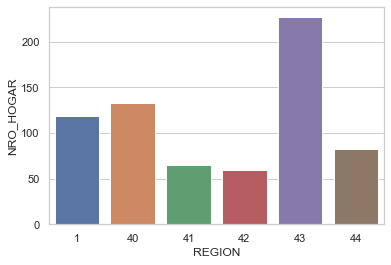

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="REGION", y="NRO_HOGAR", data=df_hogar.groupby(by=['REGION'], as_index=False).agg({'NRO_HOGAR': 'sum'}))

¿Cómo se distribuye el Ingreso Total Familiar? Y el ingreso per cápita? ¿Cuáles son los valores promedio? ¿Y sus medianas?

In [ ]:
df_hogar['ITF']

0       13000
1      145500
2       19000
3       24000
4       43000
        ...  
661     16100
662         0
663     36600
664     49000
665     18000
Name: ITF, Length: 666, dtype: int64

<AxesSubplot:xlabel='ITF', ylabel='Count'>

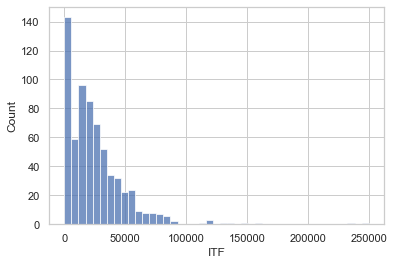

In [ ]:
sns.histplot(data=df_hogar, x="ITF")

In [ ]:
df_hogar['ITF'].describe()

count       666.000000
mean      24973.881381
std       25929.513065
min           0.000000
25%        8025.000000
50%       19650.000000
75%       34000.000000
max      250000.000000
Name: ITF, dtype: float64

In [ ]:
df_hogar['ITF']

0       13000
1      145500
2       19000
3       24000
4       43000
        ...  
661     16100
662         0
663     36600
664     49000
665     18000
Name: ITF, Length: 666, dtype: int64

<AxesSubplot:xlabel='IPCF', ylabel='Count'>

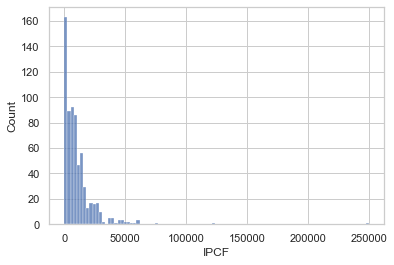

In [ ]:
sns.histplot(data=df_hogar, x="IPCF")

In [ ]:
df_hogar['IPCF'].describe()

count       666.000000
mean      10619.343649
std       14968.883140
min           0.000000
25%        2720.000000
50%        7416.665000
75%       14000.000000
max      250000.000000
Name: IPCF, dtype: float64

¿Cuántas viviendas tienen acceso al agua por la red pública? Revisar la columna IV7 para responder esta pregunta.

In [ ]:
df_hogar['IV7'].unique()

array([1, 2], dtype=int64)

In [ ]:
df_hogar['IV7'].value_counts()

1    627
2     39
Name: IV7, dtype: int64

Crear una nueva columna que represente la cantidad de habitaciones por habitante del hogar. ¿Cómo es su distribución?

In [ ]:
df_hogar.columns

Index(['CODUSU', 'Unnamed: 1', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'REALIZADA',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA', 'IV1', 'IV1_ESP', 'IV2',
       'IV3', 'IV3_ESP', 'IV4', 'IV5', 'IV6', 'IV7', 'IV7_ESP', 'IV8', 'IV9',
       'IV10', 'IV11', 'IV12_1', 'IV12_2', 'IV12_3', 'II1', 'II2', 'II3',
       'II3_1', 'II4_1', 'II4_2', 'II4_3', 'II5', 'II5_1', 'II6', 'II6_1',
       'II7', 'II7_ESP', 'II8', 'II8_ESP', 'II9', 'V1', 'V2', 'V21', 'V22',
       'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13',
       'V14', 'V15', 'V16', 'V17', 'V18', 'V19_A', 'V19_B', 'IX_TOT',
       'IX_MEN10', 'IX_MAYEQ10', 'ITF', 'DECIFR', 'IDECIFR', 'RDECIFR',
       'GDECIFR', 'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR',
       'GDECCFR', 'PDECCFR', 'ADECCFR', 'PONDIH', 'VII1_1', 'VII1_2', 'VII2_1',
       'VII2_2', 'VII2_3', 'VII2_4'],
      dtype='object')

In [ ]:
df_hogar['Cant_habit_por_habitante']= df_hogar['IV2']/ df_hogar['IX_TOT']
df_hogar

,CODUSU,Unnamed: 1,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECCFR,ADECCFR,PONDIH,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4,Cant_habit_por_habitante
0,TQRMNOQXUHLMKSCDEGGFB00590361,1,2018,3,1,1,42,S,10,479,...,,7,537,1,0,98,0,0,0,7.000000
1,TQRMNORSSHKNLUCDEGGFB00618609,1,2018,3,1,1,42,S,10,448,...,,10,493,1,0,98,0,0,0,0.800000
2,TQRMNOUQRHJOKRCDEGIBJ00613161,1,2018,3,1,1,41,N,12,280,...,04,5,528,1,0,98,0,0,0,1.000000
3,TQRMNOSTUHKMKRCDEGIBJ00618817,1,2018,3,1,1,41,N,12,212,...,07,9,432,1,0,98,0,0,0,1.000000
4,TQRMNOPWWHJMLLCDEGGFB00613105,1,2018,3,1,1,42,S,10,478,...,,6,534,1,2,98,0,0,0,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,TQRMNOPWYHLNOTCDEIJAH00593477,1,2018,3,1,1,1,S,33,1388,...,,5,1753,2,4,98,0,0,0,3.500000
662,TQRMNORWQHLOSTCDEIJAH00593201,1,2018,3,1,1,1,S,33,1645,...,,12,0,3,0,1,4,0,0,0.750000
663,TQRMNOQRRHMOKQCDEIJAH00599611,1,2018,3,1,1,1,S,33,2112,...,,5,4514,4,3,1,2,0,0,0.750000
664,TQRMNOPPQHLLKNCDEIJAH00593363,1,2018,3,1,1,1,S,33,1583,...,,9,1768,1,0,98,0,0,0,1.500000


<AxesSubplot:xlabel='Cant_habit_por_habitante', ylabel='Count'>

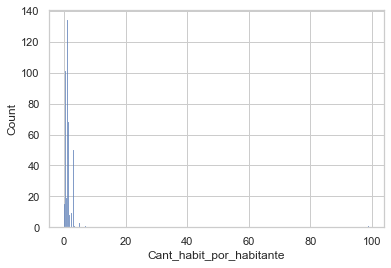

In [ ]:
sns.histplot(data=df_hogar, x="Cant_habit_por_habitante")

¿Existe alguna relación a simple vista entre la cantidad de cuartos que tiene un hogar y el nivel de ingresos del mismo? Realizar un scatter plot para visualizar ambas variables.

<AxesSubplot:xlabel='ITF', ylabel='IV2'>

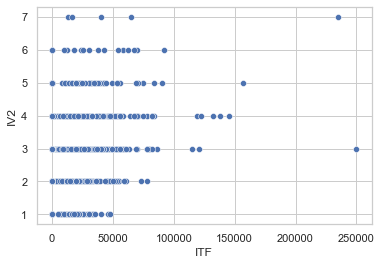

In [ ]:
sns.scatterplot(data=df_hogar[df_hogar['IV2']< 20], x="ITF", y="IV2")